In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import sklearn
from sklearn.linear_model import LinearRegression

/home/h-kiwata/.pyenv/versions/3.6.5/envs/IntelligentInfoProcess/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

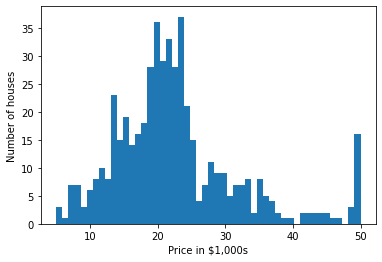

In [3]:
# データのヒストグラム化
plt.hist(boston.target,bins=50)

# 横軸のラベル名を設定
plt.xlabel('Price in $1,000s')
# 縦軸のラベル名を設定
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

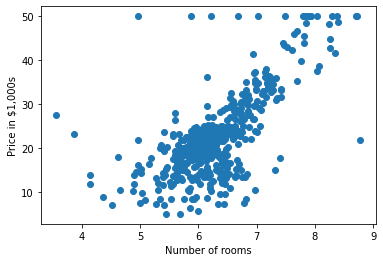

In [4]:
# 部屋の数と価格の関係を表したグラフ
## ラベルがRMとなっている5番目の列が部屋数
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

In [5]:
# DataFrameを作成
boston_df = DataFrame(boston.data)
# 列名をつける
boston_df.columns = boston.feature_names
# 新しい列を作り目的変数である価格を格納
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# 説明変数
X_multi = boston_df.drop('Price', 1)
# 説明変数をX、目的変数をYとして格納
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

# 中身を確認
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [7]:
# モデル作成
# fit関数でモデル生成
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [8]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_train - pred_train) ** 2)))
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝20.71
X_testを使ったモデルの平均二乗誤差＝27.22


Text(0.5, 1.0, 'Residual Plots')

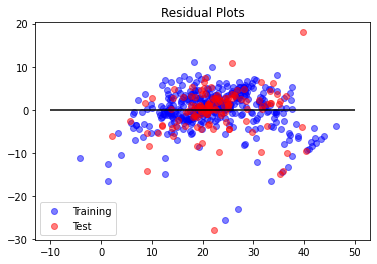

In [9]:
# 学習用データの残差プロット
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')